In [197]:
import numpy as np
import matplotlib.pyplot as plt

In [198]:
h = 0.02
x_l, x_r = -1, 1
y_l, y_r = -1, 1
k1 = 10
k2 = 10
lx, ly = np.abs(x_r- x_l), np.abs(y_r - y_l)
Nx, Ny = int(np.round(lx / h)), int(np.round(ly / h))
hx, hy = lx / Nx, ly / Ny

x = np.linspace(x_l + hx / 2, x_r - hx / 2, Nx)
y = np.linspace(y_l + hy / 2, y_r - hy / 2, Ny)

X, Y = np.meshgrid(x, y, indexing="ij")

print(Nx)

100


In [199]:
def f(x, y):
    return - 2 * (k1 ** 2 + 1) * np.cos(2 * k1 * x) + 2 * (k2 ** 2 + 1) * np.cos(2 * k2 * y)

def phi_l():
    return k1 * np.sin(2 * k1)

def phi_r():
    return k1 * np.sin(2 * k1)

def phi_b():
    return -k2 * np.sin(2 * k2)

def phi_t():
    return -k2 * np.sin(2 * k2)

def real_solution(x, y):
    return np.sin(k1 * x + k2 * y) * np.sin(k1 * x - k2 * y)
     

In [200]:
def RHS(X, Y):
    res = f(X, Y)
    res[0, :] += phi_l() / hx
    res[-1, :] += phi_r() / hx
    res[:, 0] += phi_b() / hy
    res[:, -1] += phi_t() / hy
    return res

def L(u):
    res = np.zeros_like(u)
    res[1:, :] += (u[1:, :] - u[:-1, :]) / hx ** 2
    res[:-1, :] += (u[:-1, :] - u[1:, :]) / hx ** 2
    res[:, 1:] += (u[:, 1:] - u[:, :-1]) / hy ** 2
    res[:, :-1] += (u[:, :-1] - u[:, 1:]) / hy ** 2

    # res[0, :] += phi_l() / hx
    # res[-1, :] += phi_r() / hx
    # res[:, 0] += phi_b() / hy
    # res[:, -1] += phi_t() / hy

    return res


In [201]:
u = np.zeros_like(X)
epsilon = 1e-6
F = RHS(X, Y)
lambda_min_n = 4
lambda_max_n = 4 / (hx ** 2) * np.pow(np.sin(np.pi * (Nx - 1) * hx / (2 * lx)), 2) + 4 / (hx ** 2) * np.pow(np.sin(np.pi * (Ny - 1) * hy / (2 * ly)), 2) + 4

tau = 2 / (lambda_min_n + lambda_max_n)
print(tau)
r = L(u) - F
iter = 0
u_new = u + tau * (F - L(u))
while np.linalg.norm(u_new - u) > epsilon:
    u = u_new
    u_new = u + tau * (F - L(u))
    iter += 1

    if iter > 100000:
        print('iteration break')
        break

9.998467433083479e-05


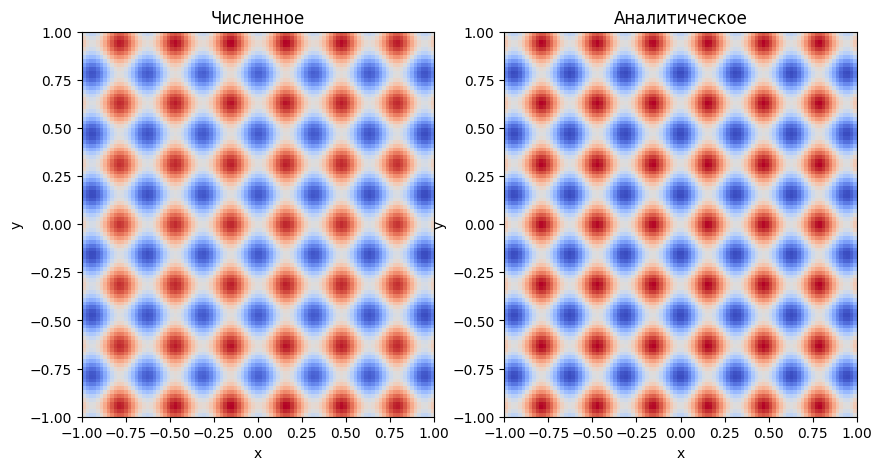

In [202]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(u.T, origin='lower', cmap='coolwarm', extent=(x_l, x_r, y_l, y_r), aspect='auto')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(f'Численное')

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(real_solution(X, Y).T, origin='lower', cmap='coolwarm', extent=(x_l, x_r, y_l, y_r), aspect='auto')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title(f'Аналитическое')

plt.show()